\tableofcontents{}

\title{Tutorial 5-Quantum Circuits} \author{Tsemo Peniel Bertrand-September 30th 2020} \maketitle

In [3]:
%matplotlib inline
from qutip import*
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product,rx,cphase
from qutip import Qobj
import numpy as np
from IPython.display import Image 

\section{Introduction}

In the field of quantum physics, there is a branch called quantum computation which studies the information in a way quantic or how to exploit the quantum superposition to increase the power and speed of classical computers. Oppositely to electrical circuits used in classical physics, the model we use in quantum computation is the quantum circuit which contains one or several quantum  gates,takes input qubits and returns also qubits by applying his containing quantum gates. When studying phenomena including many qubits, we deal with very calculations, hence the importance of digital.

In this notebook, we will first see how to represent and manipulate quantum circuits with QuTiP, and secondly we will do the same manipulations with the library Sympy. 


\section{Quantum circuits}
\subsection{Quantum Information Processing (QIP)}

The Quantum Information Processor (QIP) is a qutip module used to implement numerically operations of quantum computing such as quantum algorithms design and even for experimental realisation . The first side of this module  is the `qutip.qip.QubitCircuit` submodule used for unitary evolutions done by  products of quantum gates matrix representations. The other side is the `qutip.qip.device.Processor` submodule which uses open system solvers to simulate noisy quantum system device.

### Quantum Circuit

The commonly model used in quantum computing is the quantum cicuit model. To represent a quantum circuit in QuTiP, we use `qutip.qip.QubtiCircuit`. The informations of each quantum gate is stored in the `qutip.qip.operators.Gate` class object. For the matrix representation of each gate, we use the class method `qutip.qip.QubitCircuit.propagators`. The matrix representation of the whole quantum circuit is obtained by carrying out the matrices products.

  Let's do some manipulations to get started.

In [4]:
qbc=QubitCircuit(N=3)
H_gate=Gate(name="SWAP",targets=[1,2])
qbc.add_gate(H_gate)
qbc.add_gate("CNOT",controls=0,targets=2)
qbc.add_gate(H_gate)
print(qbc.gates)

[Gate(SWAP, targets=[1, 2], controls=None), Gate(CNOT, targets=[2], controls=[0]), Gate(SWAP, targets=[1, 2], controls=None)]


In [5]:
u_list=qbc.propagators()
print(gate_sequence_product(u_list))

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


There are some pre-defined gates that we can show in the table below:

|Gate name| Description|
|-----:   | -------:   |
|"RX"     | Rotation around x-axis|
|"RY"      | Rotation around y-axis|
|"RZ"      | Rotation around z-axis|
|"SQRTNOT"| Square root of not gate|
|"SNOT"    | hadamard gate   |
|"PHASEGATE"| Add a phase of one to state 1|
|"CNOT"     | Controlled NOT gate|
| "SWAP"    | Swap the states of two qubits|
|"SQRTSWAP"  | Squared root of SWAP gate|
|"TOFFOLI"   | Toffoli gate|


QuTiP also allows the user to define their own gates

In [127]:
def user_gate1(arg_value):

    mat=np.zeros((4,4), dtype=np.complex)
    mat[0,0]=mat[1,1]=1
    mat[2:4,2:4]=rx(arg_value)
    return Qobj(mat, dims=[[2,2],[2,2]])

user_gate1(np.pi)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00-1.j 6.123234e-17+0.j]]

In [128]:
def user_gate2():
    mat1=np.array([[0.,1],[1,0.]])
    return Qobj(mat1, dims=[[2],[2]])

user_gate2()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [129]:
qc=QubitCircuit(2)
qc.user_gates={"CTRLRX":user_gate1,
               "X":     user_gate2}

#control=0, target=1
qc.add_gate("CTRLRX", targets=[1,0], arg_value=np.pi)
#control=1, target=0
qc.add_gate("CTRLRX",targets=[0,1],arg_value=np.pi)
g_T=Gate("X",targets=[1])
qc.add_gate(g_T)
prop=qc.propagators()
prop[0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]]

In [131]:
prop[1]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]]

In [133]:
prop[2]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [4]:
cphase(np.pi/2)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j]]

In [8]:
q = QubitCircuit(3, reverse_states=False)
q.add_gate("CNOT", controls=[1], targets=[2])
q.png

FileNotFoundError: [Errno 2] No such file or directory: 'qcirc.png'

Still searching how to solve this problem working with Ubuntu sir

\section{Symbolic(Sympy) quantum computing}

In [2]:
from sympy import*
from sympy import init_printing
init_printing(use_latex=True)
from sympy import Eq
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.circuitplot import circuit_plot,CircuitPlot,labeller,Mz,CreateOneQubitGate
from sympy.physics.quantum.qasm import Qasm

## Gates
Gates are operators which acts on qubits states

In [159]:
X(0)

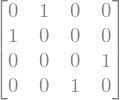

In [160]:
represent(X(0), nqubits=2)

In [161]:
H(1)*Qubit('00')

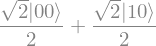

In [162]:
qapply(H(1)*Qubit('00'))

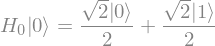

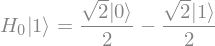

In [170]:
for gate in [H,X,Y,Z,S,T]:
    for state in [Qubit('0'),Qubit('1')]:
        lhs=gate(0)*state
        ghs=qapply(lhs)
        display(Eq(lhs,ghs))

## Symbolic gate rules and circuit simplification

In [172]:
for g1 in (H,Y,Z):
    for g2 in (X,S,T):
        e=Commutator(g1(0),g2(0))
        display(Eq(e,e.doit()))

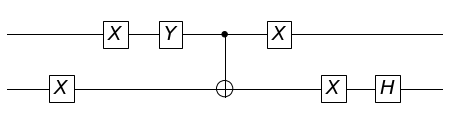

In [181]:
c=H(0)*X(0)*X(1)*CNOT(1,0)*Y(1)*Y(1)**2*X(1)**3*Z(0)**2*X(0)**3
circuit_plot(c,nqubits=2)

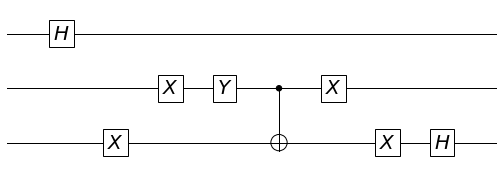

In [185]:
c=c*H(2)
circuit_plot(c,nqubits=3)

In [186]:
gate_simp(c)

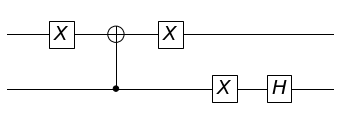

In [197]:
a=c=H(0)*X(0)*X(1)*CNOT(0,1)*X(1)*Y(1)**2*X(1)**3*Z(0)**2*X(1)**3
circuit_plot(a,nqubits=2)

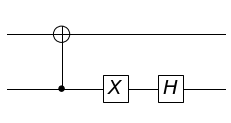

In [198]:
circuit_plot(gate_simp(a),nqubits=2)

## Gate decomposition
To create a symbolic controlled-Y gate

In [200]:
CY10=CGate(1,Y(0))
CY10

To decompose into elementary gates and plot it

In [202]:
CY10.decompose()

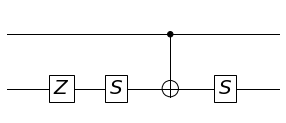

In [203]:
circuit_plot(CY10.decompose(),nqubits=2)

In [229]:
gates=[CGate(1,Y(0)),CGate(1,Z(0)),SWAP(1,0)]

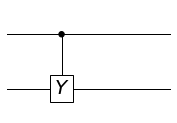

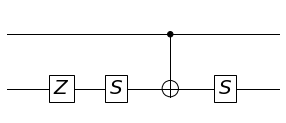

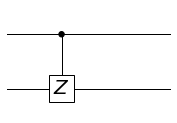

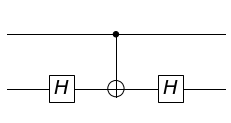

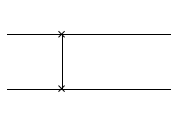

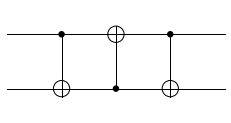

In [231]:
for g in gates:
    dg=g.decompose()
    display(Eq(g,dg))
    circuit_plot(g,nqubits=2)
    circuit_plot(dg,nqubits=2)

## Another way of plotting quantum circuits called qasm


### X-gate test 

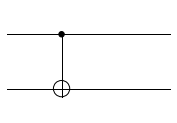

In [241]:
CircuitPlot(CNOT(1,0),2)

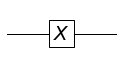

In [242]:
CircuitPlot(X(0),1)

### Making arbitrary gates

It's very easy to create one qubit-gate of our choice

In [247]:
Vgate=CreateOneQubitGate('V')
sqrtXGate=CreateOneQubitGate('sqrt-x','\sqrt{X}')

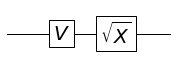

In [251]:
CircuitPlot(sqrtXGate(0)*Vgate(0),1)

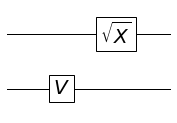

In [252]:
CircuitPlot(sqrtXGate(1)*Vgate(0),2)

We can make controled gates with these gates

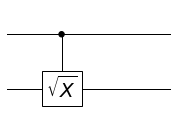

In [255]:
CircuitPlot(CGate(1,sqrtXGate(0)),2)

### Example1:EPR creation
Goal:

![EPR creation](test1.png "EPR creation")

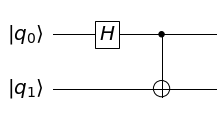

In [257]:
CircuitPlot(CNOT(1,0)*H(1),2,labels=labeller(2))

We can also plot the `Qasm` version.

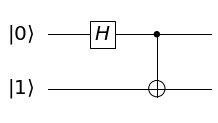

In [7]:
q=Qasm('qubit 0','qubit 1','h 0','cnot 0,1')
q.plot()

We can proceed by calling the commands directly

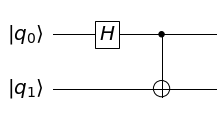

In [9]:
q=Qasm()
q.qubit('q_0')
q.qubit('q_1')
q.h('q_0')
q.cnot('q_0','q_1')
q.plot()

### Example2: Teleportatortation Gate
Goal:

![Teleporation Gate](test2.png "Teleporation Gate")

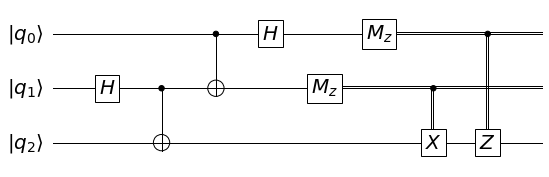

In [17]:
circ=CGate(2,Z(0))*CGate(1,X(0))*Mz(2)*Mz(1)*H(2)*CNOT(2,1)*CNOT(1,0)*H(1)
CircuitPlot(circ,3,labels=labeller(3))

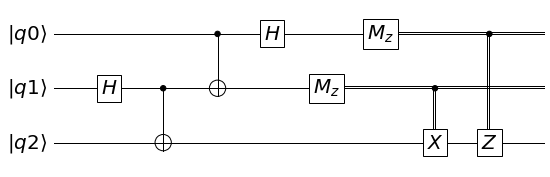

In [18]:
q=Qasm('qubit q0','qubit q1','qubit q2', 'h q1',
       'cnot q1,q2','cnot q0,q1','h q0','measure q1',
       'measure q0', 'c-x q1,q2','c-z q0,q2')
q.plot()

### Example3: QFT on 3 qubits
Goal:

![QFT](test3.png "QFT 3-qubits")

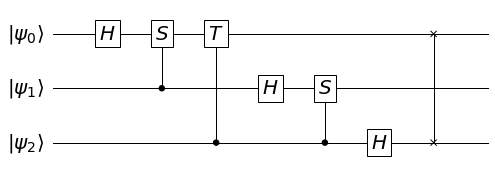

In [25]:
CircuitPlot(SWAP(0,2)*H(0)*CGate(0,S(1))*H(1)*CGate(0,T(2))*CGate(1,S(2))*H(2),3,labels=labeller(3,'\psi'))

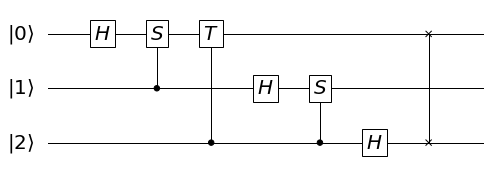

In [11]:
# qasm version

q=Qasm("def   c-S,1,'S'",
     "def   c-T,2,'T'",
     "qubit 0",
     "qubit 1",
     "qubit 2",
     "h     0",
     "c-S   1,0",
     "c-T   2,0",
     "nop 1",
     "h  1",
     "c-S 2,1",
     "h  2",
     "swap 0,2")  
q.plot()

In [7]:
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.3
Cython,0.29.15
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,7.12.0
Python,"3.7.6 (default, Jan 8 2020, 19:59:22) [GCC 7.3.0]"
OS,posix [linux]
